In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [2]:
#L'emplacement de la bd:
url = "C:/Users/elmer/pfe/credit.csv"

In [3]:
#La lecture des données
data = pd.read_csv(url)

In [4]:
data.head()

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Credit_history,Loan_Status
0,LP001032,Male,0,Graduate,No,4950,125,360,Urban,1,No
1,LP001824,Male,1,Graduate,No,2882,123,480,Semiurban,1,Yes
2,LP002928,Male,0,Graduate,No,3000,56,180,Semiurban,1,Yes
3,LP001814,Male,2,Graduate,No,9703,112,360,Urban,1,Yes
4,LP002244,Male,0,Graduate,No,2333,136,360,Urban,1,Yes


In [5]:
data.drop(["Loan_ID"],axis = 1,inplace = True)

In [6]:
#Vérifier s'il y'a des colonnes qui comportent les null values
data.apply(lambda x: sum(x.isnull()),axis=0)

Gender              0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Property_Area       0
Credit_history      0
Loan_Status         0
dtype: int64

In [7]:
data['Dependents'].value_counts()

0     225
2      69
1      61
3+     29
Name: Dependents, dtype: int64

In [8]:
data["Dependents"].replace("3+",3,inplace = True)

In [9]:
data['Dependents'] = data['Dependents'].astype(str).astype(int)

In [10]:
data['LoanAmount'] = (data['LoanAmount']*1000)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            384 non-null    object
 1   Dependents        384 non-null    int32 
 2   Education         384 non-null    object
 3   Self_Employed     384 non-null    object
 4   ApplicantIncome   384 non-null    int64 
 5   LoanAmount        384 non-null    int64 
 6   Loan_Amount_Term  384 non-null    int64 
 7   Property_Area     384 non-null    object
 8   Credit_history    384 non-null    int64 
 9   Loan_Status       384 non-null    object
dtypes: int32(1), int64(4), object(5)
memory usage: 28.6+ KB


In [12]:
Counter(data['Loan_Status'])

Counter({'No': 134, 'Yes': 250})

In [13]:
Counter(data['Loan_Status'])['Yes']/data['Loan_Status'].size

0.6510416666666666

In [14]:
pre_y=data['Loan_Status']
pre_X = data.drop('Loan_Status', axis=1)
dm_X = pd.get_dummies(pre_X)
dm_y = pre_y.map(dict(Yes=1, No=0))

In [15]:
smote = SMOTE()
X1,y = smote.fit_sample(dm_X,dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

In [16]:
dm_X.head()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_history,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,4950,125000,360,1,0,1,1,0,1,0,0,0,1
1,1,2882,123000,480,1,0,1,1,0,1,0,0,1,0
2,0,3000,56000,180,1,0,1,1,0,1,0,0,1,0
3,2,9703,112000,360,1,0,1,1,0,1,0,0,0,1
4,0,2333,136000,360,1,0,1,1,0,1,0,0,0,1


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [18]:
dm_X.corr(method='kendall')

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_history,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Dependents,1.000000,0.146205,0.137698,-0.059406,-0.006006,-0.201296,0.201296,-0.002125,0.002125,-0.056441,0.056441,-0.035378,-0.020774,0.055929
ApplicantIncome,0.146205,1.000000,0.393259,-0.029400,-0.007762,-0.012581,0.012581,0.134489,-0.134489,-0.196924,0.196924,0.064010,-0.014231,-0.047511
LoanAmount,0.137698,0.393259,1.000000,0.031153,-0.020864,-0.097044,0.097044,0.132573,-0.132573,-0.148892,0.148892,0.064365,-0.000119,-0.062476
Loan_Amount_Term,-0.059406,-0.029400,0.031153,1.000000,0.015492,0.094112,-0.094112,0.072307,-0.072307,0.091022,-0.091022,-0.001534,-0.003145,0.004751
Credit_history,-0.006006,-0.007762,-0.020864,0.015492,1.000000,-0.010776,0.010776,0.039454,-0.039454,0.048449,-0.048449,-0.078548,0.105842,-0.033259
Gender_Female,-0.201296,-0.012581,-0.097044,0.094112,-0.010776,1.000000,-1.000000,0.087706,-0.087706,-0.014272,0.014272,-0.036684,0.083983,-0.051329
Gender_Male,0.201296,0.012581,0.097044,-0.094112,0.010776,-1.000000,1.000000,-0.087706,0.087706,0.014272,-0.014272,0.036684,-0.083983,0.051329
Education_Graduate,-0.002125,0.134489,0.132573,0.072307,0.039454,0.087706,-0.087706,1.000000,-1.000000,-0.012926,0.012926,-0.080826,0.038990,0.038215
Education_Not Graduate,0.002125,-0.134489,-0.132573,-0.072307,-0.039454,-0.087706,0.087706,-1.000000,1.000000,0.012926,-0.012926,0.080826,-0.038990,-0.038215
Self_Employed_No,-0.056441,-0.196924,-0.148892,0.091022,0.048449,-0.014272,0.014272,-0.012926,0.012926,1.000000,-1.000000,-0.051112,0.039061,0.009243


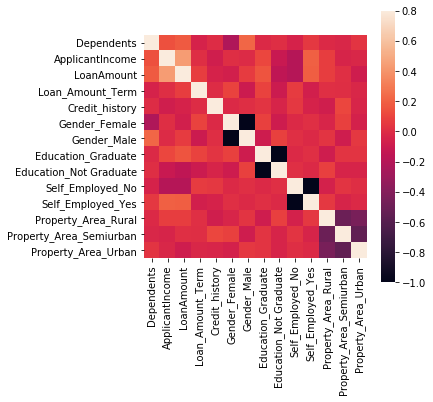

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
corrmat=dm_X.corr()
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(corrmat,vmax=.8,square=True)

In [20]:
from sklearn.tree import DecisionTreeClassifier
arbre= DecisionTreeClassifier(random_state = 0) #gini par défaut
arbre.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [21]:
y_pred = arbre.predict(X_test)

In [22]:
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Decision Tree is:  0.7666666666666667


In [23]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_pred,y_test,zero_division=1))

[[54 21]
 [14 61]]
              precision    recall  f1-score   support

           0       0.72      0.79      0.76        68
           1       0.81      0.74      0.78        82

    accuracy                           0.77       150
   macro avg       0.77      0.77      0.77       150
weighted avg       0.77      0.77      0.77       150



In [24]:
dm_X.head()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_history,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,4950,125000,360,1,0,1,1,0,1,0,0,0,1
1,1,2882,123000,480,1,0,1,1,0,1,0,0,1,0
2,0,3000,56000,180,1,0,1,1,0,1,0,0,1,0
3,2,9703,112000,360,1,0,1,1,0,1,0,0,0,1
4,0,2333,136000,360,1,0,1,1,0,1,0,0,0,1


In [25]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Predicting the Test set results
y_pred = logistic.predict(X_test)

In [27]:
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Logistic Regression is:  0.7933333333333333


In [28]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_pred,y_test,zero_division=1))

[[54 21]
 [10 65]]
              precision    recall  f1-score   support

           0       0.72      0.84      0.78        64
           1       0.87      0.76      0.81        86

    accuracy                           0.79       150
   macro avg       0.79      0.80      0.79       150
weighted avg       0.80      0.79      0.79       150



In [29]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
svm = SVC(kernel='poly',degree=2)
svm.fit(X_train, y_train)

SVC(degree=2, kernel='poly')

In [30]:
y_pred = svm.predict(X_test)

In [31]:
print('The accuracy of SVM is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of SVM is:  0.7866666666666666


In [32]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_pred,y_test,zero_division=1))

[[51 24]
 [ 8 67]]
              precision    recall  f1-score   support

           0       0.68      0.86      0.76        59
           1       0.89      0.74      0.81        91

    accuracy                           0.79       150
   macro avg       0.79      0.80      0.78       150
weighted avg       0.81      0.79      0.79       150



In [33]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [34]:
# Predicting the Test set results
y_pred = forest.predict(X_test)

In [36]:
print('The accuracy of RF is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of RF is:  0.8


In [37]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_pred,y_test,zero_division=1))

[[57 18]
 [12 63]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        69
           1       0.84      0.78      0.81        81

    accuracy                           0.80       150
   macro avg       0.80      0.80      0.80       150
weighted avg       0.80      0.80      0.80       150



In [38]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
cpt = 100
mean_acc = np.zeros((cpt-1))
std_acc = np.zeros((cpt-1))
for n in range(1,cpt):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0]) #Computing std deviation
mean_acc

array([0.76      , 0.73333333, 0.74666667, 0.73333333, 0.74666667,
       0.76666667, 0.78      , 0.76      , 0.77333333, 0.76666667,
       0.78      , 0.78      , 0.77333333, 0.75333333, 0.76666667,
       0.78666667, 0.76      , 0.76      , 0.76      , 0.76666667,
       0.76666667, 0.77333333, 0.76666667, 0.76666667, 0.76666667,
       0.77333333, 0.77333333, 0.78666667, 0.78666667, 0.78      ,
       0.78      , 0.78      , 0.78      , 0.76666667, 0.76666667,
       0.76      , 0.76      , 0.75333333, 0.75333333, 0.74666667,
       0.76666667, 0.77333333, 0.78      , 0.78      , 0.78      ,
       0.78666667, 0.78666667, 0.8       , 0.79333333, 0.79333333,
       0.79333333, 0.78666667, 0.78666667, 0.78      , 0.78      ,
       0.77333333, 0.76666667, 0.75333333, 0.76      , 0.74666667,
       0.75333333, 0.76666667, 0.77333333, 0.76      , 0.75333333,
       0.75333333, 0.75333333, 0.75333333, 0.76      , 0.76666667,
       0.76      , 0.76      , 0.74666667, 0.75333333, 0.74666

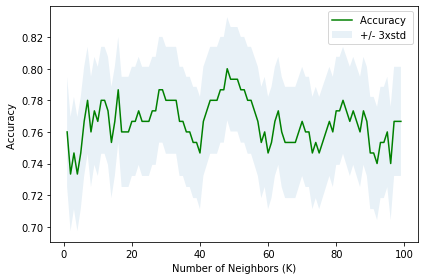

In [39]:
# Plot  model accuracy  for Different number of Neighbors 
plt.plot(range(1,cpt),mean_acc,'g')
plt.fill_between(range(1,cpt),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [40]:
neigh = KNeighborsClassifier(n_neighbors = 48).fit(X_train,y_train)

In [41]:
# Predicting the Test set results
y_pred = neigh.predict(X_test)

In [42]:
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of KNN is:  0.8


In [43]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_pred,y_test,zero_division=1))

[[52 23]
 [ 7 68]]
              precision    recall  f1-score   support

           0       0.69      0.88      0.78        59
           1       0.91      0.75      0.82        91

    accuracy                           0.80       150
   macro avg       0.80      0.81      0.80       150
weighted avg       0.82      0.80      0.80       150



In [44]:
import pickle
with open('knn','wb') as f:
 pickle.dump(neigh,f)

In [45]:
with open('knn','rb') as f:
 model = pickle.load(f)